Removed some extra columns.
Some D4 and D5 columns have -99999 values which I plan on fixing.

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
df = pd.read_csv('data/original_data/air_walk_merged.csv')

In [196]:
df.head()

,id,lat,lon,name,location_type,pm_2.5,temp_f,temp_c,humidity,pressure,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,22751,36.807377,-119.796109,#ValleyClimate,outside,19.54,84.0,28.888889,22.0,1010.30,...,0.586928,0.003201,0.500064,20,18,13,15,15.666667,4825.986205,1.290175e+06
1,30755,36.737668,-119.778839,'S' St Between Inyo and Mono,outside,18.52,93.0,33.888889,16.0,1009.91,...,0.643972,0.003847,0.600998,5,2,14,20,12.500000,3072.308296,4.465223e+05
2,122943,38.524431,-121.439374,(AMTS_SCANS_044),inside,6.00,75.0,23.888889,42.0,1021.05,...,0.190835,0.001870,0.356624,18,19,18,17,17.833333,2638.457599,4.120484e+05
3,118437,38.801826,-121.265809,*Checks before every breath*,inside,2.04,76.0,24.444444,34.0,1013.28,...,0.019445,0.000288,0.054951,13,20,19,17,17.500000,5616.022512,1.233707e+06
4,39625,37.509889,-122.317735,-------{---(@,outside,18.84,81.0,27.222222,24.0,997.21,...,-99999.000000,-99999.000000,-99999.000000,7,15,14,1,8.666667,6296.012985,7.846879e+05


In [197]:
df.shape

(9538, 140)

### Filter and drop columns

Outside only

In [198]:
df.query('location_type == "outside"', inplace = True)

In [199]:
drop_cols = [
    'id', 'lat', 'lon', 'temp_c', 'humidity', 'pressure', 
    'last_seen', '10min_avg', '30min_avg', '1hour_avg', '6hour_avg', 
    '1day_avg', 'OBJECTID', 'GEOID20', 'location_type',
    'AutoOwn0', 'AutoOwn1', 'AutoOwn2p']

df1= df.drop(columns = drop_cols)

##### D1_flag

In [200]:
df1['D1_FLAG'].value_counts()

0    6560
1       8
Name: D1_FLAG, dtype: int64

In [201]:
with pd.option_context('display.max_columns', 200):
    display(df1.query('D1_FLAG == 1'))

,name,pm_2.5,temp_f,model,hidden,flagged,downgraded,age,is_owner,1week_avg,fips_id,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,Pct_AO0,Pct_AO1,Pct_AO2p,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,R_PCTLOWWAGE,TotEmp,E5_Ret,E5_Off,E5_Ind,E5_Svc,E5_Ent,E8_Ret,E8_off,E8_Ind,E8_Svc,E8_Ent,E8_Ed,E8_Hlth,E8_Pub,E_LowWageWk,E_MedWageWk,E_HiWageWk,E_PctLowWage,D1A,D1B,D1C,D1C5_RET,D1C5_OFF,D1C5_IND,D1C5_SVC,D1C5_ENT,D1C8_RET,D1C8_OFF,D1C8_IND,D1C8_SVC,D1C8_ENT,D1C8_ED,D1C8_HLTH,D1C8_PUB,D1D,D1_FLAG,D2A_JPHH,D2B_E5MIX,D2B_E5MIXA,D2B_E8MIX,D2B_E8MIXA,D2A_EPHHM,D2C_TRPMX1,D2C_TRPMX2,D2C_TRIPEQ,D2R_JOBPOP,D2R_WRKEMP,D2A_WRKEMP,D2C_WREMLX,D3A,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,D4A,D4B025,D4B050,D4C,D4D,D4E,D5AR,D5AE,D5BR,D5BE,D5CR,D5CRI,D5CE,D5CEI,D5DR,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
914,3130 Pacific Ave,20.19,82.0,PMS5003+PMS5003+BME280,False,False,False,0,False,12.77,60750601001,6,75,60100,1,488.0,"San Jose-San Francisco-Oakland, CA",41860.0,"San Francisco-Oakland-Berkeley, CA",4673221,2400290,2241034,6529.125277,5019.63289,1509.492387,6.436060,4119,1343.0,1329.0,0.715,0.027840,0.468774,0.503386,1782,226,280,1276,0.126824,5430,225,1939,603,2209,454,225,1939,603,1782,454,235,192,0,581,754,4095,0.106998,0.889703,2.728732,3.597236,0.149057,1.284538,0.399472,1.463406,0.300763,0.149057,1.284538,0.399472,1.180529,0.300763,0.155681,0.127195,0.0,4.486939,1,4.085779,0.818343,0.818343,0.807291,0.755450,0.867187,0.673537,0.721143,0.425806,0.862708,0.494176,0.328177,0.510776,33.518770,4.248306,2.088651,27.181814,236.247048,5.087803,18.655278,5.935770,245.910482,53.845916,-99999.0,0.0,0.0,43.33,18.371209,0.01052,87797,68894,-99999,-99999,2.596770e-04,0.316345,2.471990e-04,0.350401,-99999.0,-99999.0,-99999.0,-99999.0,20,18,20,1,13.333333,25173.38839,2.642301e+07
917,Cow Hollow School,24.09,85.0,PMS5003+PMS5003+BME280,False,False,False,1,False,15.07,60750601001,6,75,60100,1,488.0,"San Jose-San Francisco-Oakland, CA",41860.0,"San Francisco-Oakland-Berkeley, CA",4673221,2400290,2241034,6529.125277,5019.63289,1509.492387,6.436060,4119,1343.0,1329.0,0.715,0.027840,0.468774,0.503386,1782,226,280,1276,0.126824,5430,225,1939,603,2209,454,225,1939,603,1782,454,235,192,0,581,754,4095,0.106998,0.889703,2.728732,3.597236,0.149057,1.284538,0.399472,1.463406,0.300763,0.149057,1.284538,0.399472,1.180529,0.300763,0.155681,0.127195,0.0,4.486939,1,4.085779,0.818343,0.818343,0.807291,0.755450,0.867187,0.673537,0.721143,0.425806,0.862708,0.494176,0.328177,0.510776,33.518770,4.248306,2.088651,27.181814,236.247048,5.087803,18.655278,5.935770,245.910482,53.845916,-99999.0,0.0,0.0,43.33,18.371209,0.01052,87797,68894,-99999,-99999,2.596770e-04,0.316345,2.471990e-04,0.350401,-99999.0,-99999.0,-99999.0,-99999.0,20,18,20,1,13.333333,25173.38839,2.642301e+07
920,Playgroup Preschool,30.33,73.0,PMS5003+PMS5003+BME280,False,False,False,1,False,17.04,60750601001,6,75,60100,1,488.0,"San Jose-San Francisco-Oakland, CA",41860.0,"San Francisco-Oakland-Berkeley, CA",4673221,2400290,2241034,6529.125277,5019.63289,1509.492387,6.436060,4119,1343.0,1329.0,0.715,0.027840,0.468774,0.503386,1782,226,280,1276,0.126824,5430,225,1939,603,2209,454,225,1939,603,1782,454,235,192,0,581,754,4095,0.106998,0.889703,2.728732,3.597236,0.149057,1.284538,0.399472,1.463406,0.300763,0.149057,1.284538,0.399472,1.180529,0.300763,0.155681,0.127195,0.0,4.486939,1,4.085779,0.818343,0.818343,0.807291,0.755450,0.867187,0.673537,0.721143,0.425806,0.862708,0.494176,0.328177,0.510776,33.518770,4.248306,2.088651,27.181814,236.247048,5.087803,18.655278,5.935770,245.910482,53.845916,-99999.0,0.0,0.0,43.33,18.371209,0.01052,87797,68894,-99999,-99999,2.596770e-04,0.316345,2.471990e-04,0.350401,-99999.0,-99999.0,-99999.0,-99999.0,20,18,20,1,13.333333,25173.38839,2.642301e+07
922,Presidio: West Washington,22.22,73.0,PMS5003+PMS5003+BME280,Fa

In [202]:
df1.drop(columns='D1_FLAG', inplace = True)

##### Walkability Describe

In [203]:
with pd.option_context('display.max_columns', 200):
    display(df.loc[:,'E5_Ret':'D5DEI'].describe())

,E5_Ret,E5_Off,E5_Ind,E5_Svc,E5_Ent,E8_Ret,E8_off,E8_Ind,E8_Svc,E8_Ent,E8_Ed,E8_Hlth,E8_Pub,E_LowWageWk,E_MedWageWk,E_HiWageWk,E_PctLowWage,D1A,D1B,D1C,D1C5_RET,D1C5_OFF,D1C5_IND,D1C5_SVC,D1C5_ENT,D1C8_RET,D1C8_OFF,D1C8_IND,D1C8_SVC,D1C8_ENT,D1C8_ED,D1C8_HLTH,D1C8_PUB,D1D,D1_FLAG,D2A_JPHH,D2B_E5MIX,D2B_E5MIXA,D2B_E8MIX,D2B_E8MIXA,D2A_EPHHM,D2C_TRPMX1,D2C_TRPMX2,D2C_TRIPEQ,D2R_JOBPOP,D2R_WRKEMP,D2A_WRKEMP,D2C_WREMLX,D3A,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,D4A,D4B025,D4B050,D4C,D4D,D4E,D5AR,D5AE,D5BR,D5BE,D5CR,D5CRI,D5CE,D5CEI,D5DR,D5DRI,D5DE,D5DEI
count,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6.568000e+03,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000
mean,65.918240,146.455542,251.846224,427.172655,112.593788,65.918240,105.945646,251.846224,201.356121,112.593788,120.724726,105.091809,40.509896,172.826127,257.829019,573.331303,0.269691,3.398548,8.012142,3.582072,0.260527,0.719655,0.378950,1.750091,0.472849,0.260527,0.377378,0.378950,0.729900,0.472849,0.450346,0.569844,0.342278,6.980620,0.001218,2.492406,0.651673,0.586945,0.716324,0.606824,0.525778,0.509411,0.540602,0.466786,0.346393,0.473834,4.775469,0.320303,15.805488,0.962671,2.081332,12.761485,80.896852,2.236382,9.932338,5.865437,69.294921,22.186833,-47503.406956,0.032314,0.080674,-34981.573301,-34944.232667,-34987.463492,79087.569732,66814.646620,2.296478e+04,-3672.963916,0.001998,0.370175,0.001948,0.407187,-47761.396512,-47761.285836,-47761.396565,-47761.277078
std,226.805167,954.386529,1485.914713,1717.705386,292.486773,226.805167,811.822138,1485.914713,1082.782120,292.486773,735.832511,498.665116,387.861605,452.605201,778.688304,2751.740828,0.124850,5.327989,11.175842,14.063405,0.833661,5.588315,2.222663,8.071074,1.740141,0.833661,3.568290,2.222663,4.589154,1.740141,2.877023,3.373873,4.077830,16.364305,0.034882,23.301847,0.217217,0.224334,0.182274,0.181047,0.194984,0.174006,0.188160,0.282745,0.271953,0.280552,8.249127,0.315073,10.892324,2.230362,2.711260,9.292966,88.241150,7.576800,16.558875,13.073227,82.108396,37.976761,50200.373108,0.142689,0.235226,47700.609816,47728.252319,47696.286678,87917.731987,72466.561323,1.726296e+05,117793.744412,0.005823,0.251057,0.005366,0.258548,49953.187857,49953.293693,49953.187806,49953.302068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.201734,0.000000,0.000000,0.000000,0.033017,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,-99999.000000,-99999.000000,-99999.000000,33.000000,89.000000,-9.999900e+04,-99999.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000
25%,0.000000,2.000000,9.000000,44.000000,2.000000,0.000000,2.000000,9.000000,14.000000,2.000000,0.000000,8.000000,0.000000,31.000000,37.000000,39.000000,0.182713,0.324743,0.704303,0.128184,0.000000,0.00114

#### Clean -99999.0 values

columns with -99999: D4A, D4C, D4D, D4E, D5BR, D5BE, D5DR, D5RI, D5DE, D5DEI

In [204]:
(df1['D4A'] == -99999).value_counts()

False    3431
True     3137
Name: D4A, dtype: int64

<AxesSubplot:ylabel='Frequency'>

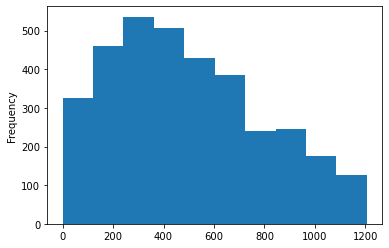

In [205]:
df1.query('D4A >= 0')['D4A'].plot(kind = 'hist')

Missing values indicate missing transit data or > 3/4 mile from the 
population center to the nearest transportation stop.
See page 23 / footnote 65 of the [technical documentation](https://www.epa.gov/sites/default/files/2021-06/documents/epa_sld_3.0_technicaldocumentationuserguide_may2021.pdf).
A reasonable value to impute is 2000, indicating a very large distance to
transit as well as setting a low transit flag.

In [206]:
df1['Low_transit_flag_dist'] = (df1['D4A'] == -99999.)
df1['D4A'].replace({-99999.: 2000}, inplace = True)

In [207]:
(df1['D4C'] == -99999).value_counts()

False    4270
True     2298
Name: D4C, dtype: int64

D4C, D4D, and D4E are frequency measures so we can impute missing values with 0.
See page 24, from technical documentation.

In [208]:
((df1['D4C'] >= 0) == (df1['D4D'] >= 0)).all()

True

In [209]:
((df1['D4C'] >= 0) == (df1['D4E'] >= 0)).all()

True

In [210]:
df1['Low_transit_flag_freq'] = df1['D4C'] == -99999.
# df1['Low_transit_flag_freq'].value_counts()
df1.loc[df1['Low_transit_flag_freq'], ['D4C', 'D4D', 'D4E']] = 0

<AxesSubplot:ylabel='Frequency'>

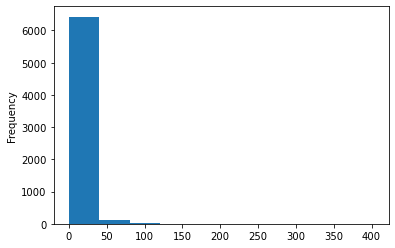

In [211]:
df1['D4C'].plot(kind = 'hist')

In [212]:
d5cols = ['D5BR', 'D5BE', 'D5DR', 'D5DRI', 'D5DE', 'D5DEI'] 
df1[d5cols] == -99999

,D5BR,D5BE,D5DR,D5DRI,D5DE,D5DEI
0,False,False,False,False,False,False
1,False,False,False,False,False,False
4,True,True,True,True,True,True
8,True,True,True,True,True,True
12,False,False,False,False,False,False
...,...,...,...,...,...,...
9530,True,True,True,True,True,True
9532,False,False,False,False,False,False
9533,False,False,False,False,False,False
9534,False,False,False,False,False,False


The -99999 values for destination accessibility are the same as the earlier
`Low_transit_flag_dist` flag. Since these indicate the number of jobs
or working age population within transit distance of the area, a reasonable 
value to impute is 0, when very little transportation is available.

In [213]:
for col in d5cols:
    print(((df1[col] == -99999) == (df1['Low_transit_flag_dist'])).all())

True
True
True
True
True
True


array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

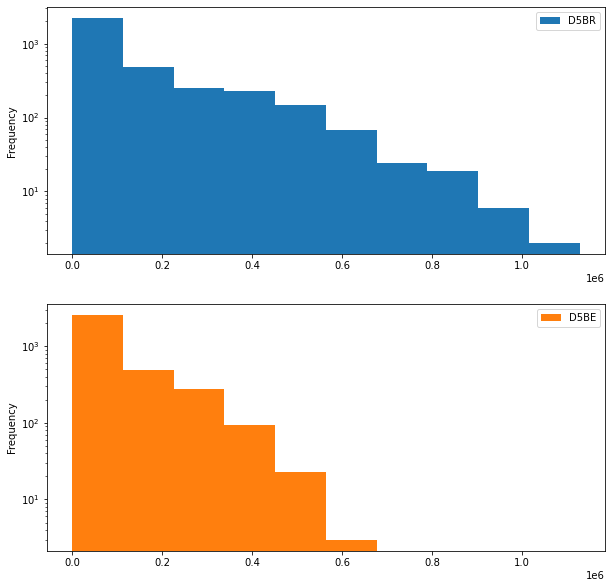

In [214]:
df1.loc[~df1['Low_transit_flag_dist'], ['D5BR', 'D5BE'] ].plot(
    subplots = True, kind = 'hist', figsize = (10, 10), 
    sharex = False, logy = True)

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

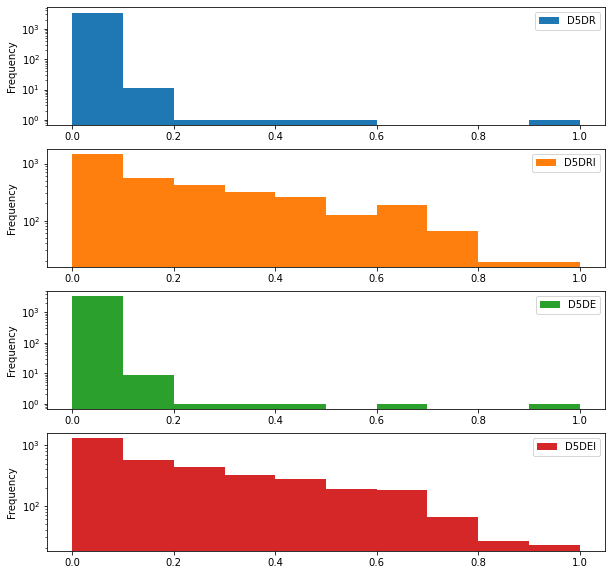

In [215]:
df1.loc[~df1['Low_transit_flag_dist'], ['D5DR', 'D5DRI', 'D5DE', 'D5DEI']].plot(
    subplots = True, kind = 'hist', figsize = (10, 10), 
    sharex = False, logy = True)

In [216]:
df1.loc[df1['Low_transit_flag_dist'], d5cols] = 0

#### Scale variables to percentages / more normal distributions.

##### Area (Water, Land, Unprotected relative to total).

In [217]:
df1[['Pct_Water', 'Pct_Land', 'Pct_Unpr']] = df1[['Ac_Water', 'Ac_Land', 'Ac_Unpr']].div(df1['Ac_Total'], axis = 0)

##### Log Acreage

<AxesSubplot:>

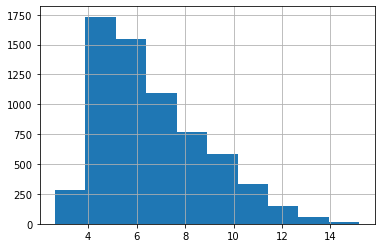

In [218]:
df1['Log_Acres'] = np.log1p(df1['Ac_Total'])
df1['Log_Acres'].hist()

##### Log Population

<AxesSubplot:>

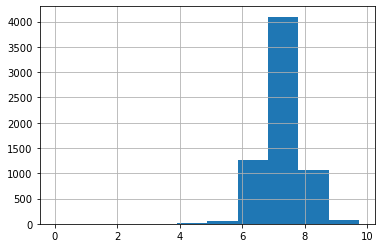

In [219]:
# df['TotPop'].hist()
df1['log_TotPop'] = np.log1p(df1['TotPop'])
df1['log_TotPop'].hist()

##### Housing Occupancy Rate

In [220]:
df1['Pct_HH_occupied'] = df1['HH'].div(df1['CountHU'], axis = 0)

##### Diversity (D2)

In [221]:
df1.loc[:, 'D2A_JPHH':'D2C_WREMLX'] # This is mostly already appropriately scaled

,D2A_JPHH,D2B_E5MIX,D2B_E5MIXA,D2B_E8MIX,D2B_E8MIXA,D2A_EPHHM,D2C_TRPMX1,D2C_TRPMX2,D2C_TRIPEQ,D2R_JOBPOP,D2R_WRKEMP,D2A_WRKEMP,D2C_WREMLX
0,1.466063,0.917728,0.917728,0.891662,0.768304,0.866894,0.772433,0.830073,0.496555,0.740571,0.760994,0.614198,0.679905
1,22.464567,0.223268,0.192313,0.226667,0.195308,0.293581,0.223464,0.246951,0.373636,0.200378,0.059624,0.030728,0.379359
4,0.246088,0.601312,0.601312,0.721792,0.675442,0.383994,0.444501,0.489292,0.345147,0.193783,0.395429,4.057803,0.046991
8,0.246088,0.601312,0.601312,0.721792,0.675442,0.383994,0.444501,0.489292,0.345147,0.193783,0.395429,4.057803,0.046991
12,1.629526,0.559777,0.559777,0.737556,0.737556,0.682299,0.605275,0.668630,0.457875,0.602782,0.867377,0.765812,0.791213
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,0.518968,0.552391,0.552391,0.527209,0.454271,0.527904,0.529933,0.581115,0.655780,0.482710,0.941176,0.888889,0.894839
9532,0.450172,0.305470,0.305470,0.462165,0.432487,0.430894,0.447652,0.489364,0.865687,0.329353,0.745377,1.683206,0.504995
9533,0.535755,0.826411,0.826411,0.889763,0.832626,0.619911,0.615384,0.660931,0.931952,0.290194,0.519252,2.851695,0.156971
9534,1.726368,0.790146,0.790146,0.680833,0.680833,0.816222,0.602239,0.659063,0.449960,0.834135,0.772406,0.629203,0.690184


In [222]:
# D2A_JPHH and D2A_WRKEMP have outliers
df1.loc[:, 'D2A_JPHH':'D2C_WREMLX'].describe() 

,D2A_JPHH,D2B_E5MIX,D2B_E5MIXA,D2B_E8MIX,D2B_E8MIXA,D2A_EPHHM,D2C_TRPMX1,D2C_TRPMX2,D2C_TRIPEQ,D2R_JOBPOP,D2R_WRKEMP,D2A_WRKEMP,D2C_WREMLX
count,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000
mean,2.492406,0.651673,0.586945,0.716324,0.606824,0.525778,0.509411,0.540602,0.466786,0.346393,0.473834,4.775469,0.320303
std,23.301847,0.217217,0.224334,0.182274,0.181047,0.194984,0.174006,0.188160,0.282745,0.271953,0.280552,8.249127,0.315073
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.208042,0.517664,0.433108,0.635228,0.498076,0.380408,0.386540,0.408399,0.258097,0.127204,0.239042,0.903226,0.009342
50%,0.464286,0.699363,0.618558,0.764205,0.639104,0.525528,0.519455,0.549969,0.473379,0.268247,0.448578,2.451378,0.233400
75%,1.173868,0.817922,0.768221,0.849422,0.743128,0.673978,0.650392,0.690721,0.677727,0.517771,0.706830,5.667984,0.570652
max,1294.000000,1.000000,0.998274,1.000000,0.972284,0.993134,0.969981,0.989403,0.999739,0.999854,1.000000,242.000000,1.000000


Log Jobs per house hold.

<AxesSubplot:>

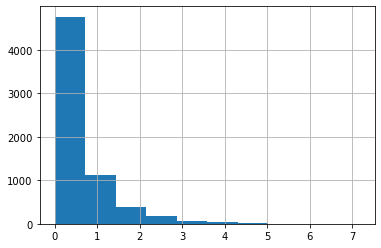

In [223]:
df1['log_D2A_JPHH'] = np.log1p(df1['D2A_JPHH'])
np.log1p(df1['D2A_JPHH']).hist() # slightly better

Log workers per job compared to regional average.

<AxesSubplot:>

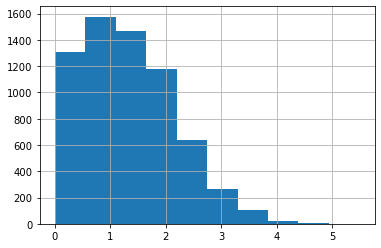

In [224]:
df1['log_D2A_WRKEMP'] = np.log1p(df1['D2A_WRKEMP'])
np.log1p(df1['D2A_WRKEMP']).hist()

##### Employment Rate (E, D1)

In [225]:
df1['Pct_Workers'] = df1['Workers'].div(df1['TotPop'], axis = 0)

In [226]:
df1.columns.slice_locs('E5_Ret', 'E8_Pub')

(39, 52)

##### Employment sector jobs relative to total employment.

In [227]:
employment_cols = df1.columns[39:52]
pct_employment_cols = ['pct_' + col for col in employment_cols]

In [228]:
df1[pct_employment_cols] = df1[employment_cols].div(df['TotEmp'], axis = 0)

In [229]:
df1[pct_employment_cols]

,pct_E5_Ret,pct_E5_Off,pct_E5_Ind,pct_E5_Svc,pct_E5_Ent,pct_E8_Ret,pct_E8_off,pct_E8_Ind,pct_E8_Svc,pct_E8_Ent,pct_E8_Ed,pct_E8_Hlth,pct_E8_Pub
0,0.156379,0.060700,0.190329,0.372428,0.220165,0.156379,0.060700,0.190329,0.335391,0.220165,0.000000,0.037037,0.000000
1,0.006776,0.000000,0.005491,0.924524,0.063208,0.006776,0.000000,0.005491,0.018343,0.063208,0.000818,0.905363,0.000000
4,0.014451,0.297688,0.043353,0.612717,0.031792,0.014451,0.297688,0.043353,0.057803,0.031792,0.465318,0.089595,0.000000
8,0.014451,0.297688,0.043353,0.612717,0.031792,0.014451,0.297688,0.043353,0.057803,0.031792,0.465318,0.089595,0.000000
12,0.075214,0.023932,0.023932,0.719658,0.157265,0.075214,0.015385,0.023932,0.131624,0.157265,0.104274,0.483761,0.008547
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,0.055556,0.032164,0.067251,0.093567,0.751462,0.055556,0.032164,0.067251,0.067251,0.751462,0.000000,0.026316,0.000000
9532,0.019084,0.022901,0.061069,0.885496,0.011450,0.019084,0.022901,0.061069,0.011450,0.011450,0.755725,0.118321,0.000000
9533,0.072034,0.250000,0.163136,0.468220,0.046610,0.072034,0.055085,0.163136,0.122881,0.046610,0.000000,0.345339,0.194915
9534,0.131604,0.113353,0.061479,0.128722,0.564841,0.131604,0.015370,0.061479,0.002882,0.564841,0.051873,0.073967,0.097983


##### Design (D3)

In [230]:
df1.columns.slice_locs('D3A', 'D3BPO4')

(86, 96)

In [231]:
design_cols = df1.columns[87:97]

In [232]:
df1.iloc[:, 87:97].describe()

,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,D4A
count,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000
mean,0.962671,2.081332,12.761485,80.896852,2.236382,9.932338,5.865437,69.294921,22.186833,1213.228701
std,2.230362,2.711260,9.292966,88.241150,7.576800,16.558875,13.073227,82.108396,37.976761,783.603346
min,0.000000,0.000000,0.000000,0.033017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.296585,3.804942,11.309733,0.000000,0.348963,0.000000,9.540670,0.783275,434.520000
50%,0.043947,1.094100,12.340091,58.376932,0.000000,3.223524,0.414470,46.573230,7.015535,1073.570000
75%,0.833698,2.761875,19.866642,125.080112,1.142245,11.825651,6.070980,102.283434,26.026233,2000.000000
max,35.319543,28.413881,59.853592,930.130573,146.448102,162.064156,251.931476,911.625358,438.674602,2000.000000


More normally distributed.

In [233]:
np.log1p(df1.loc[:, 'D3A':'D3BPO4']).describe()

,D3A,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4
count,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000
mean,2.520502,0.400049,0.859374,2.285180,3.624083,0.528951,1.562807,1.016596,3.431595,2.076888
std,0.870382,0.621444,0.688415,0.932934,1.516880,0.883029,1.279717,1.216785,1.556969,1.526941
min,0.183765,0.000000,0.000000,0.000000,0.032483,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.828890,0.000000,0.259734,1.569645,2.510389,0.000000,0.299335,0.000000,2.355241,0.578452
50%,2.816601,0.043008,0.739124,2.590774,4.083906,0.000000,1.440670,0.346755,3.862270,2.081381
75%,3.226953,0.606335,1.324917,3.038152,4.836918,0.761854,2.551447,1.955999,4.637477,3.296807
max,4.208527,3.592356,3.381467,4.108471,6.836400,4.993476,5.094144,5.533119,6.816325,6.086035


In [234]:
df1[['log_' + col for col in design_cols]] = np.log1p(df1.loc[:, 'D3A':'D3BPO4'])

##### Transit Access (D4)

In [235]:
df1.loc[:, 'D4A':'D4E'].describe()

,D4A,D4B025,D4B050,D4C,D4D,D4E
count,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000
mean,1213.228701,0.032314,0.080674,5.896553,43.237187,0.006362
std,783.603346,0.142689,0.235226,13.616432,157.389688,0.085629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,434.520000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1073.570000,0.000000,0.000000,1.670000,0.894316,0.000987
75%,2000.000000,0.000000,0.000000,6.000000,17.549629,0.004099
max,2000.000000,1.000000,1.000000,402.330000,3593.895311,5.734000


In [236]:
df1[['log_D4C', 'log_D4D', 'log_D4E']] = np.log1p(df1[['D4C', 'D4D', 'D4E']])

##### Destination Accessibility (D5)

In [237]:
df1.columns.slice_locs('D5AR', 'D5DEI')

(102, 114)

In [238]:
design_cols = df1.columns[103:115]

In [239]:
df1.iloc[:, 103:115].describe()

,D5AE,D5BR,D5BE,D5CR,D5CRI,D5CE,D5CEI,D5DR,D5DRI,D5DE,D5DEI,D2A_Ranked
count,6568.000000,6.568000e+03,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000
mean,66814.646620,7.072618e+04,44088.434227,0.001998,0.370175,0.001948,0.407187,0.001630,0.112306,0.001578,0.121065,11.051918
std,72466.561323,1.433480e+05,84663.767782,0.005823,0.251057,0.005366,0.258548,0.017315,0.188941,0.017433,0.195610,5.184039
min,89.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,12555.000000,0.000000e+00,0.000000,0.000159,0.163719,0.000164,0.196729,0.000000,0.000000,0.000000,0.000000,7.000000
50%,50407.000000,3.235000e+02,579.000000,0.000423,0.363731,0.000420,0.404276,0.000002,0.000618,0.000004,0.002154,11.000000
75%,96744.000000,6.524050e+04,48283.500000,0.001359,0.543041,0.001296,0.597752,0.000504,0.162911,0.000512,0.178562,15.000000
max,484231.000000,1.127939e+06,617792.000000,0.091781,1.000000,0.080836,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000


First 4 can take log transform.

In [240]:
destination_cols1 = df1.columns[103:107]
destination_cols1

Index(['D5AE', 'D5BR', 'D5BE', 'D5CR'], dtype='object')

In [241]:
np.log1p(df1.iloc[:, 103:107]).describe()

,D5AE,D5BR,D5BE,D5CR
count,6568.000000,6568.000000,6568.000000,6568.000000
mean,10.237673,5.514937,5.390788,0.001979
std,1.733499,5.495184,5.320261,0.005681
min,4.499810,0.000000,0.000000,0.000000
25%,9.437954,0.000000,0.000000,0.000159
50%,10.827905,5.782284,6.363028,0.000423
75%,11.479834,11.085851,10.784866,0.001358
max,13.090319,13.935904,13.333909,0.087810


In [242]:
df1[['log_' + col for col in destination_cols1]] = np.log1p(df1[destination_cols1])

The remaining features are already from 0 to 1 but can be power transformed.

In [243]:
destination_cols2 = df1.columns[107:115]
destination_cols2

Index(['D5CRI', 'D5CE', 'D5CEI', 'D5DR', 'D5DRI', 'D5DE', 'D5DEI',
       'D2A_Ranked'],
      dtype='object')

In [244]:
(df1.iloc[:, 107:115]**0.1).describe()

,D5CRI,D5CE,D5CEI,D5DR,D5DRI,D5DE,D5DEI,D2A_Ranked
count,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000
mean,0.845905,0.457339,0.857652,0.238834,0.409946,0.240468,0.419376,1.255308
std,0.190576,0.119457,0.189985,0.242845,0.409180,0.242787,0.415255,0.072716
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.834469,0.418333,0.849937,0.000000,0.000000,0.000000,0.000000,1.214814
50%,0.903812,0.459596,0.913414,0.263441,0.477607,0.291689,0.541156,1.270982
75%,0.940770,0.514369,0.949844,0.468001,0.834056,0.468759,0.841742,1.311019
max,1.000000,0.777607,1.000000,1.000000,1.000000,1.000000,1.000000,1.349283


In [245]:
df1[['pow_' + col for col in destination_cols2]] = (df1[destination_cols2])**0.1

### Target distribution

<AxesSubplot:ylabel='Frequency'>

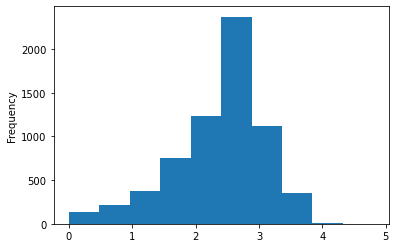

In [246]:
np.log1p(df1['1week_avg']).plot(kind = 'hist')

In [247]:
df1['log_1week_avg'] = np.log1p(df1['1week_avg'])

In [248]:
df1.describe()

,pm_2.5,temp_f,age,1week_avg,fips_id,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,...,log_D5CR,pow_D5CRI,pow_D5CE,pow_D5CEI,pow_D5DR,pow_D5DRI,pow_D5DE,pow_D5DEI,pow_D2A_Ranked,log_1week_avg
count,6568.000000,6568.000000,6.568000e+03,6568.000000,6.568000e+03,6568.000000,6568.000000,6568.000000,6568.000000,5582.000000,...,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000
mean,13.233127,81.187424,1.812476e+03,12.350295,6.153743e+10,6.098203,55.306486,232667.777253,2.103380,445.451272,...,0.001979,0.845905,0.457339,0.857652,0.238834,0.409946,0.240468,0.419376,1.255308,2.381843
std,12.238945,13.263447,3.688110e+04,8.064147,6.141208e+09,0.614239,32.755082,241133.164411,1.162508,78.190914,...,0.005681,0.190576,0.119457,0.189985,0.242845,0.409180,0.242787,0.415255,0.072716,0.714639
min,0.000000,29.000000,0.000000e+00,0.000000,1.073001e+10,1.000000,1.000000,100.000000,1.000000,142.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.070000,76.000000,0.000000e+00,6.440000,6.037140e+10,6.000000,27.000000,10901.000000,1.000000,472.000000,...,0.000159,0.834469,0.418333,0.849937,0.000000,0.000000,0.000000,0.000000,1.214814,2.006871
50%,10.580000,82.000000,1.000000e+00,11.690000,6.067006e+10,6.000000,61.000000,132200.000000,2.000000,488.000000,...,0.000423,0.903812,0.459596,0.913414,0.263441,0.477607,0.291689,0.541156,1.270982,2.540814
75%,23.702500,89.000000,1.000000e+00,16.320000,6.085510e+10,6.000000,85.000000,442250.000000,3.000000,488.000000,...,0.001358,0.940770,0.514369,0.949844,0.468001,0.834056,0.468759,0.841742,1.311019,2.851862
max,122.380000,135.000000,1.982830e+06,121.000000,9.013881e+10,9.000000,125.000000,980200.000000,9.000000,536.000000,...,0.087810,1.000000,0.777607,1.000000,1.000000,1.000000,1.000000,1.000000,1.349283,4.804021


In [249]:
df1.head()

,name,pm_2.5,temp_f,model,hidden,flagged,downgraded,age,is_owner,1week_avg,...,log_D5CR,pow_D5CRI,pow_D5CE,pow_D5CEI,pow_D5DR,pow_D5DRI,pow_D5DE,pow_D5DEI,pow_D2A_Ranked,log_1week_avg
0,#ValleyClimate,19.54,84.0,PMS5003+PMS5003+BME280,False,False,False,1,False,43.48,...,0.002841,0.991947,0.553883,0.994245,0.572362,0.948110,0.563022,0.933045,1.349283,3.795040
1,'S' St Between Inyo and Mono,18.52,93.0,PMS5003+PMS5003+BME280,False,False,False,1,False,41.81,...,0.002836,0.991763,0.552428,0.991633,0.577695,0.956944,0.573469,0.950358,1.174619,3.756772
4,-------{---(@,18.84,81.0,PMS5003+PMS5003+BME280,False,False,False,1,False,11.38,...,0.000283,0.899103,0.439787,0.908644,0.000000,0.000000,0.000000,0.000000,1.214814,2.516082
8,Carlmont,21.40,88.0,PMS5003+PMS5003+BME280,False,False,False,1,False,8.49,...,0.000283,0.899103,0.439787,0.908644,0.000000,0.000000,0.000000,0.000000,1.214814,2.250239
12,003 FK Parking Lot,0.17,135.0,PMS5003+PMS5003+BME280,False,False,False,0,False,8.93,...,0.000679,0.945063,0.478952,0.950749,0.514757,0.776821,0.493659,0.782951,1.319508,2.295560


In [250]:
df1.to_csv('data/air_walk_merged_clean.csv', index=False)

In [252]:
df_la = df1.query('CSA == 348')

In [255]:
df_la['COUNTYFP'].value_counts()

37     474
59     110
111     91
71      74
65      71
Name: COUNTYFP, dtype: int64

In [253]:
df_la.to_csv('data/air_walk_merged_clean_LA.csv', index=False)